**1-Visualisation des donnees **

In [6]:
import pandas as pd
df = pd.read_csv('reviews_product_category.csv', sep=';')
df_manuelle=pd.read_csv('dfcleaned - dfcleaned.csv', sep=',')
df = df.dropna(subset=['Commentaire'])
print(df.shape)
df['Commentaire'] = df['Commentaire'].str.lower()

# Supprimer les doublons
df = df.drop_duplicates(subset='Commentaire', keep='first')
print(df.shape)
print(df_manuelle)

(4536, 2)
(1636, 2)
      Note                      Commentaire    Label
0        5           dima nekhouh wou naawd  Positif
1        5                         j\’adore  Positif
2        4                        mche maya  Positif
3        5                    je recommande  Positif
4        5     le prix est très raisonnable  Positif
...    ...                              ...      ...
1567     5                         éclat ++  Positif
1568     2                tjr en repture !!  Négatif
1569     2  moyen lahkika je recommande pas  Négatif
1570     4                      bahi barcha  Positif
1571     5                       satisfaite  Positif

[1572 rows x 3 columns]


Clean 

In [7]:
import re
# Définir une fonction pour supprimer les émojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["  # Range of emojis in Unicode
        "\U0001F600-\U0001F64F"  # Emoticônes (Smileys)
        "\U0001F300-\U0001F5FF"  # Symboles et pictogrammes
        "\U0001F680-\U0001F6FF"  # Transport et symboles divers
        "\U0001F700-\U0001F77F"  # Symboles supplémentaires
        "\U0001F780-\U0001F7FF"  # Supp. Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supp. Arrows-C, Extended-C
        "\U0001F900-\U0001F9FF"  # Supp. Arrows-D, Objects
        "\U0001FA00-\U0001FA6F"  # Chess, symbols, new emojis
        "\U0001FA70-\U0001FAFF"  # Symbols and pictograms extended
        "\U00002702-\U000027B0"  # Divers symboles et pictogrammes
        "\U000024C2-\U0001F251"  # Autres symboles divers
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)  # Remplacer par une chaîne vide

# Appliquer la fonction à la colonne 'Commentaire'
df['Commentaire'] = df['Commentaire'].apply(remove_emojis)
# Vérifier les chaînes vides ou contenant uniquement des espaces dans la colonne 'Commentaire'
empty_strings = df['Commentaire'].str.strip() == ''  # 'strip()' supprime les espaces avant et après
num_empty_strings = (df['Commentaire'].str.strip() == '').sum()
# Supprimer les lignes où 'Commentaire' est vide ou uniquement composé d'espaces
df_cleaned = df[df['Commentaire'].str.strip() != '']
num_empty_strings = (df_cleaned['Commentaire'].str.strip() == '').sum()
df_cleaned=df_cleaned.reset_index(drop=True)
print(df_cleaned.shape)

(1572, 2)


**Label**

In [20]:
! pip install >TextBlob


ERROR: You must give at least one requirement to install (see "pip help install")

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


      Note                      Commentaire   Label
0        5           dima nekhouh wou naawd  Neutre
1        5                         j\’adore  Neutre
2        4                        mche maya  Neutre
3        5                    je recommande  Neutre
4        5     le prix est très raisonnable  Neutre
...    ...                              ...     ...
1567     5                         éclat ++  Neutre
1568     2                tjr en repture !!  Neutre
1569     2  moyen lahkika je recommande pas  Neutre
1570     4                      bahi barcha  Neutre
1571     5                       satisfaite  Neutre

[1572 rows x 3 columns]
Label
Neutre     1180
Positif     377
Négatif      15
Name: count, dtype: int64


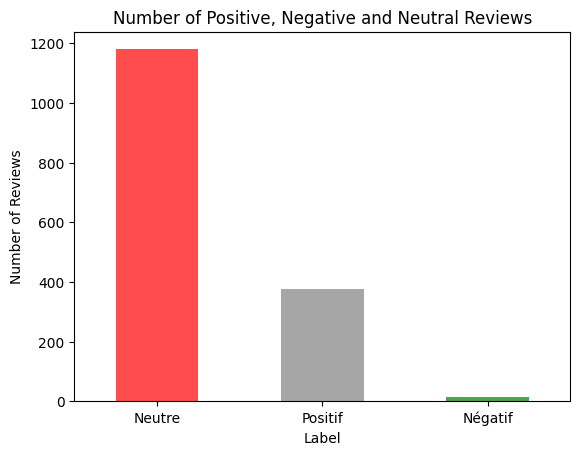

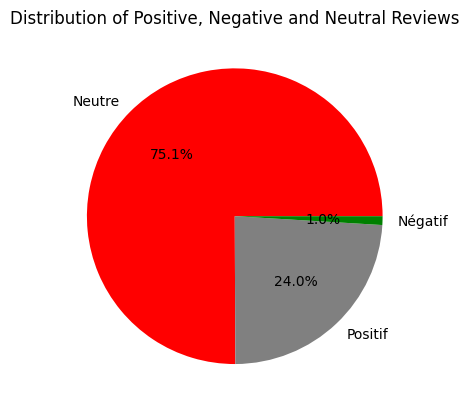

In [22]:

from textblob import TextBlob
import matplotlib.pyplot as plt
def assign_label_with_textblob(comment):
    # Analyse de la polarité du commentaire
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity
    
    # Attribution des labels basés sur la polarité
    if polarity > 0:
        return 'Positif'
    elif polarity < 0:
        return 'Négatif'
    else:
        return 'Neutre'
df_cleaned['Label'] = df_cleaned['Commentaire'].apply(assign_label_with_textblob)
print(df_cleaned)
count_labels = df_cleaned['Label'].value_counts()
print(count_labels) 
# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels' , color=['red', 'grey', 'green'],alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews') 
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()
# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

   Note                   Commentaire    Label
0     5        dima nekhouh wou naawd  Positif
1     5                      j\’adore  Positif
2     4                     mche maya  Positif
3     5                 je recommande  Positif
4     5  le prix est très raisonnable  Positif
Label
Positif    1478
Neutre       56
Négatif      38
Name: count, dtype: int64


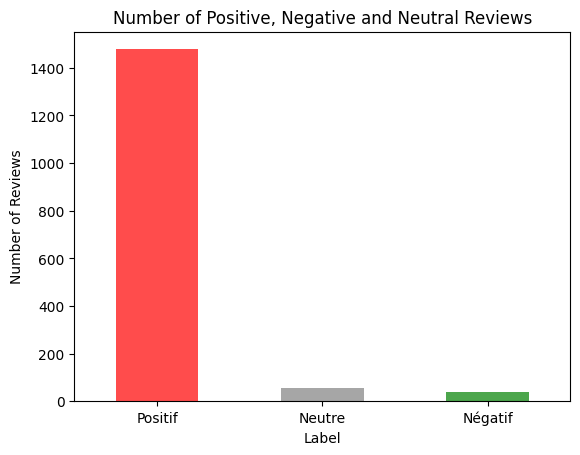

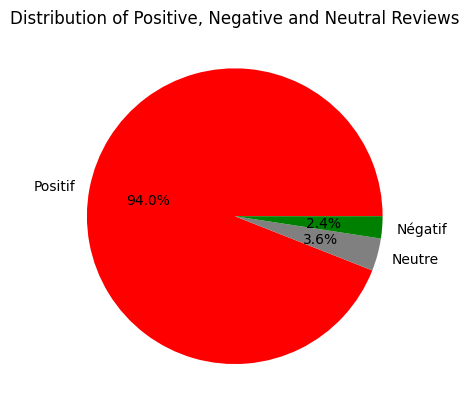

In [10]:
def assign_label(note):
    if note == 1:
        return 'Négatif'
    elif note == 2:
        return 'Neutre'
    else:
        return 'Positif'
df_cleaned['Label'] = df_cleaned['Note'].apply(assign_label)
print(df_cleaned.head())
count_labels = df_cleaned['Label'].value_counts()
print(count_labels) 
df_cleaned.to_csv('dfcleaned.csv', index=False)
# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels' , color=['red', 'grey', 'green'],alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews') 
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()
# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

use BN to label

   Note                   Commentaire    Label
0     5        dima nekhouh wou naawd  Positif
1     5                      j\’adore  Positif
2     4                     mche maya  Positif
3     5                 je recommande  Positif
4     5  le prix est très raisonnable  Positif
Label
Positif    1567
Neutre        5
Name: count, dtype: int64


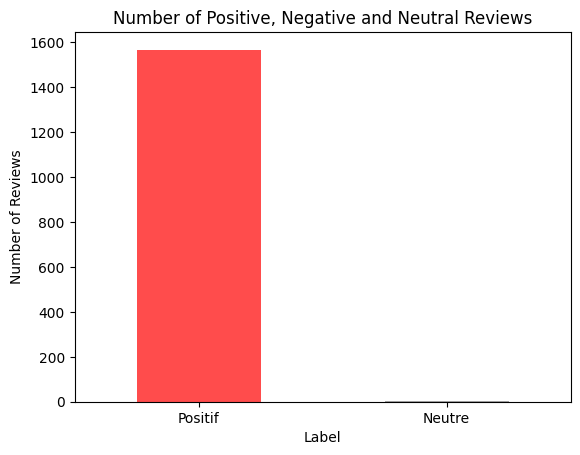

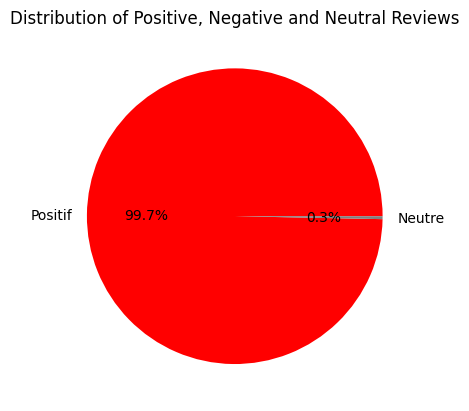

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# Diviser les données en variables indépendantes (X) et dépendantes (y)
X = df_cleaned['Commentaire']
y = df_cleaned['Note']  # Vous pouvez utiliser 'Note' comme cible pour entraîner un modèle

# Split en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un pipeline qui transforme le texte et applique un modèle de classification
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Transformation du texte en vecteurs
    ('classifier', MultinomialNB())     # Classification avec Naive Bayes
])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédire les labels pour les commentaires
y_pred = pipeline.predict(X)

# Convertir les prédictions en labels (Négatif, Neutre, Positif) en fonction des scores de prédiction
def assign_label_from_prediction(note):
    if note <= 2:
        return 'Négatif'
    elif note == 3:
        return 'Neutre'
    else:
        return 'Positif'

# Appliquer les prédictions pour assigner les labels
df_cleaned['Label'] = pd.Series(y_pred).apply(assign_label_from_prediction)

# Afficher les 5 premières lignes du dataframe avec les nouveaux labels
print(df_cleaned.head())

# Calculer la distribution des labels
count_labels = df_cleaned['Label'].value_counts()
print(count_labels)

# Afficher un graphique en barres de la distribution des labels
count_labels.plot(kind='bar', title='Distribution des labels', color=['red', 'grey', 'green'], alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews') 
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Afficher un graphique circulaire de la distribution des labels
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

In [12]:
%pip install nltk
import nltk
nltk.download('vader_lexicon')  # Télécharger les ressources nécessaires pour l'analyse des sentiments
nltk.download('stopwords')
import string
from nltk.corpus import stopwords #Natural Language Toolkit
from nltk import PorterStemmer as Stemmer
def process(text):#rend le texte en minuscule, supprime la ponctuation, les mots vides et applique le stemming (forme de jetons)
# lowercase it
  text = text.lower()
# remove punctuation
  text = ''.join([t for t in text if t not in string.punctuation])
# remove stopwords
  text = [t for t in text.split() if t not in stopwords.words('english')]
# stemming
  st = Stemmer()
  text = [st.stem(t) for t in text]
# return token list
  return text

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenevo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenevo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(analyzer=process)#construit une matrice sparse où chaque élément est le score TF-IDF d'un terme dans un document.
data = tfidfv.fit_transform(df_cleaned['Commentaire'])#renvoie une matrice sparse contenant les scores TF-IDF pour chaque document.


In [14]:
########### TRAIN ############
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
reviwes_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())   # train on TFIDF vectors with NB
])
x_train, x_test, y_train, y_test = train_test_split(df_cleaned['Commentaire'],df_cleaned['Label'], test_size=0.20, random_state = 21)
reviwes_filter.fit(x_train, y_train)

######## TEST ##############
predictions = reviwes_filter.predict(x_test)
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 315
Number of wrong of predictions 2


In [15]:
# Filtrer les prédictions erronées classées comme '+' (mais qui étaient en réalité '-')
incorrect_positive_predictions = df_cleaned.iloc[y_test.index][(y_test != predictions) & (predictions == 'Positif')]
# Afficher les messages erronés classés comme 'positive'
print("Predictions erronées classées comme 'positive':")
print(incorrect_positive_predictions)


Predictions erronées classées comme 'positive':
      Note                                        Commentaire   Label
1160     3  jarbto lhkika ma tbdel chay\nyomken lezem nest...  Neutre
1435     3                            pas mal , à recommander  Neutre


In [16]:
# commentaire à tester
commentaire_to_test = ['j\'aime ce produit']
# Prédiction pour le message
prediction = reviwes_filter.predict(commentaire_to_test)

print(f"The comment is classified as: {prediction[0]}")

The comment is classified as: Positif


In [17]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

      Neutre       0.00      0.00      0.00         0
     Positif       1.00      0.99      1.00       315

    accuracy                           0.99       315
   macro avg       0.50      0.50      0.50       315
weighted avg       1.00      0.99      1.00       315



c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap